In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydataset as data

import seaborn as sns

from env import host, user, password

# Use the iris database to answer the following questions:

In [52]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## What does the distribution of petal lengths look like?

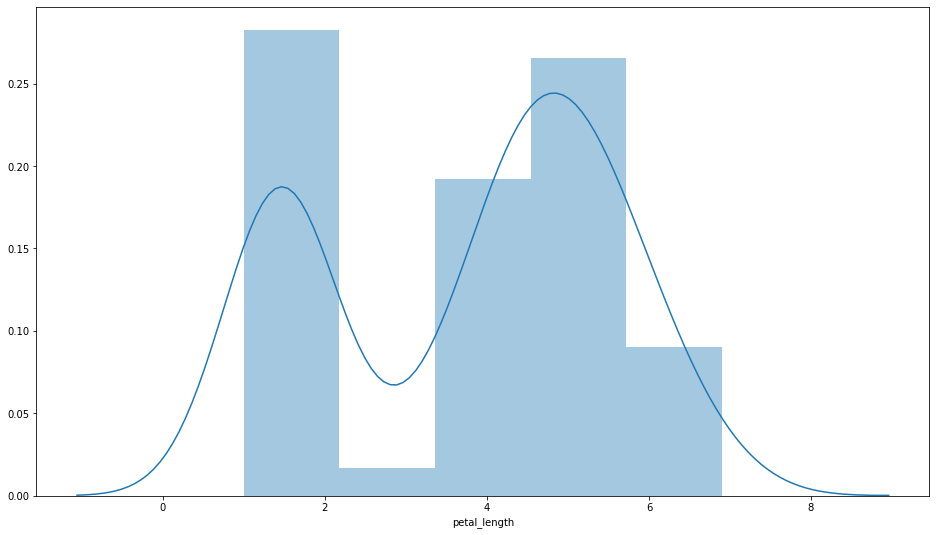

In [53]:
plt.figure(figsize=(16,9))
sns.distplot(iris.petal_length)

The distribution of petal lengths appears to be bimodal. There might be a need to further investigate by saperating the flowers into their own groups.

## Is there a correlation between petal length and petal width?

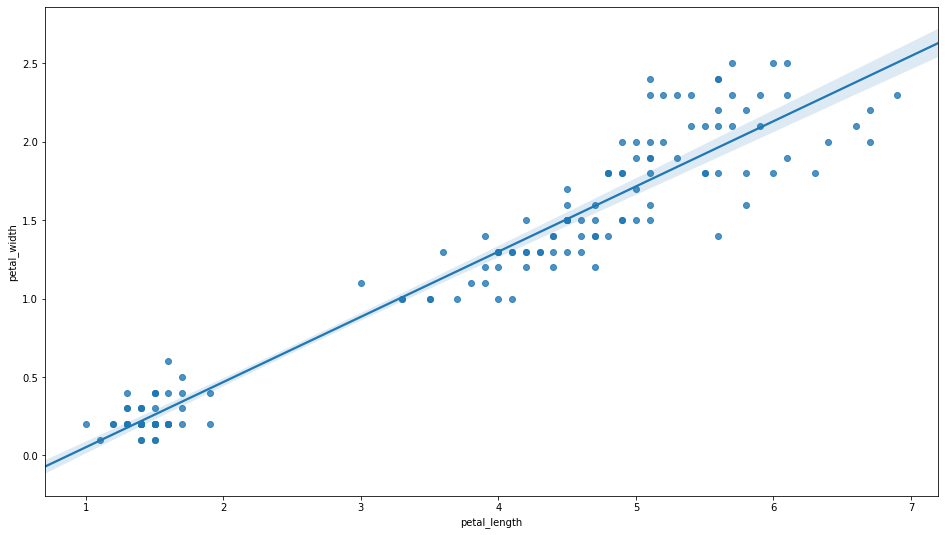

In [54]:
plt.figure(figsize=(16,9))
sns.regplot(x='petal_length', y='petal_width', data=iris)

The scatter plot shows two distinct groups, and that there is a positive correlation between petal length
and petal width.

## Would it be reasonable to predict species based on sepal width and sepal length? Which features would be best used to predict species?

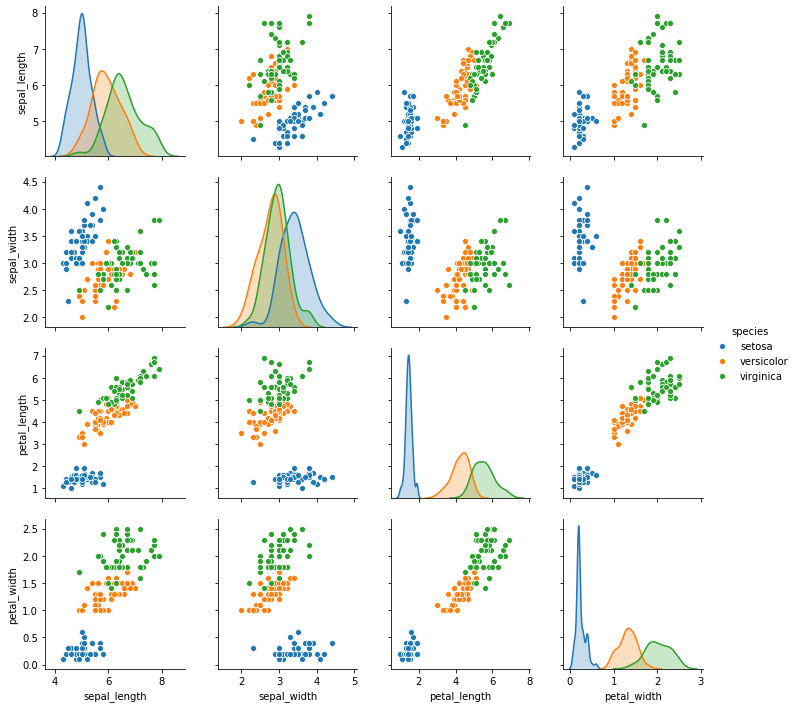

In [55]:
sns.pairplot(iris, hue='species')

Using a pair plot, with hue seperation applied to the different flower species, we can see that sepal length and sepal width has a clear distinction between setosa and vericolor/virinica. However, the later two are fairly entangled, and would present issue trying to parse them just from those features. If, however, we look at the petal width and petal length features, we can start to see clear patterns emerge based on species.

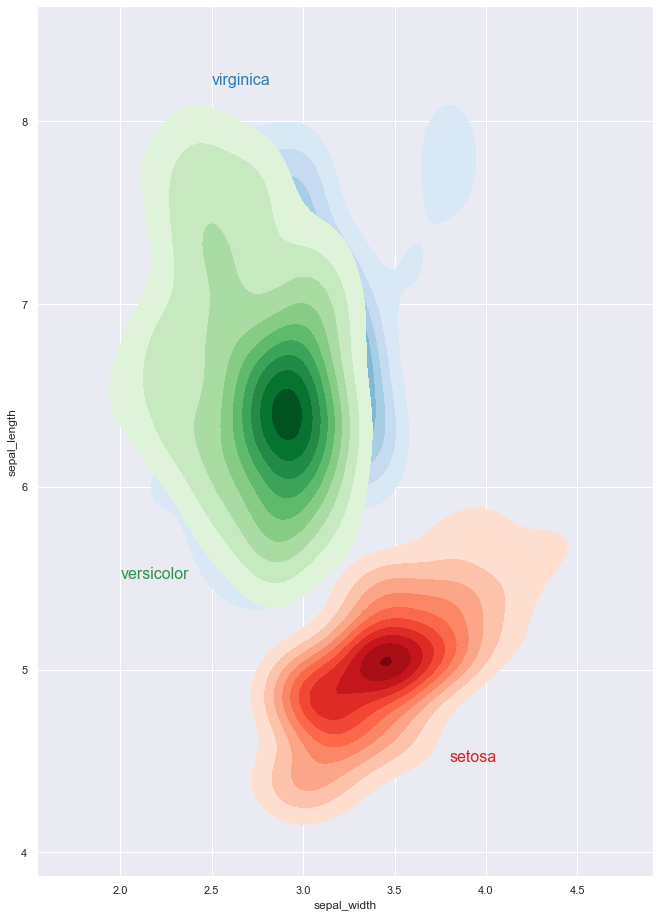

In [262]:
sns.set(style="darkgrid")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")
versicolor = iris.query("species == 'versicolor'")

# Set up the figure
f, ax = plt.subplots(figsize=(16, 16))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor.sepal_width, virginica.sepal_length,
                 cmap="Greens", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)
ax.text(2, 5.5, "versicolor", size=16, color=green)

plt.show()

## Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [48]:
anscombe = sns.load_dataset('anscombe')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


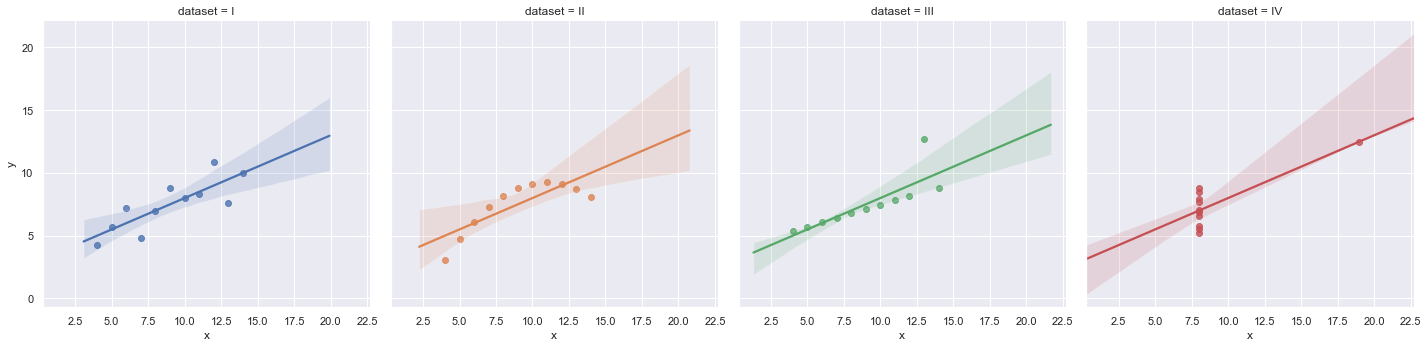

In [145]:
sns.lmplot(x='x', y='y', col='dataset', hue="dataset", data=anscombe)
plt.show()

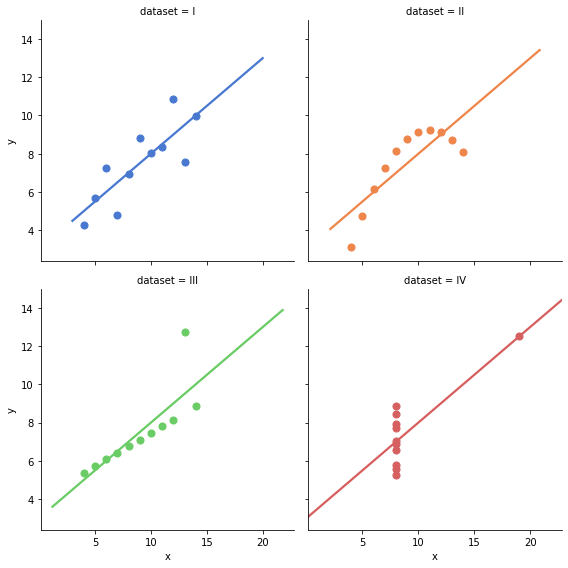

In [112]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

## Load the InsectSprays dataset and read it's documentation.

In [124]:
insect_sprays = pydataset.data("InsectSprays")
pydataset.data("InsectSprays",show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

## Create a boxplot that shows the effectiveness of the different insect sprays.

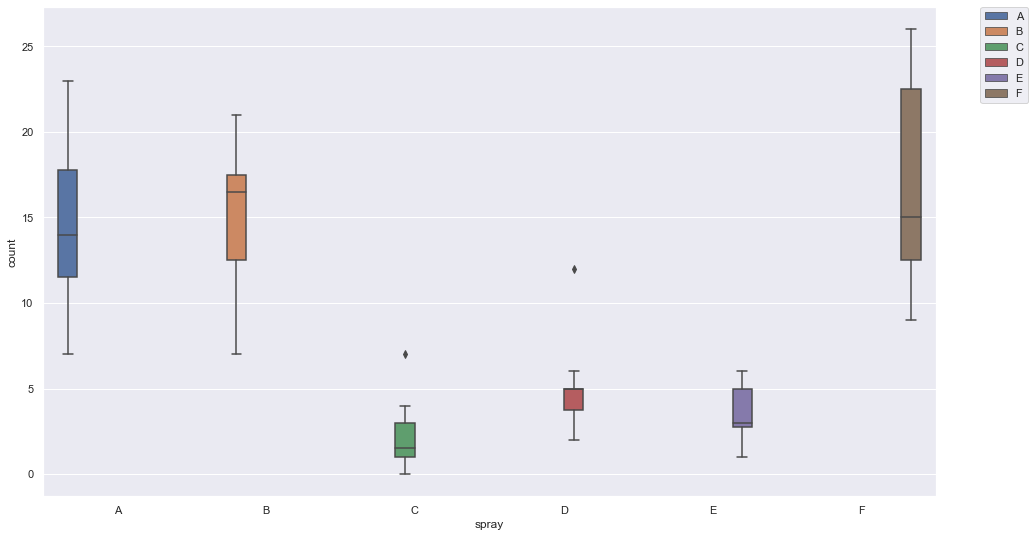

In [201]:
plt.figure(figsize=(16, 9))
sns.boxplot(data=insect_sprays, y='count', x='spray', hue='spray')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Load the swiss dataset and read it's documentation. 

In [212]:
swiss = pydataset.data('swiss')
pydataset.data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [213]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


## Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [214]:
swiss['is_catholic'] = swiss.Catholic >= 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


## Does whether or not a province is Catholic influence fertility?

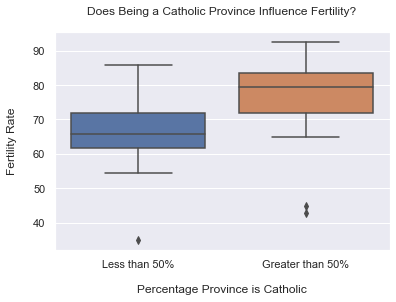

In [215]:
sns.boxplot(data=swiss, y='Fertility', x='is_catholic')
plt.xlabel("\nPercentage Province is Catholic")
plt.ylabel('Fertility Rate\n')
plt.title("Does Being a Catholic Province Influence Fertility?\n")
xticks, labels = plt.xticks()
labels = ['Less than 50%', 'Greater than 50%']
plt.xticks(xticks, labels)
plt.show()

## What measure correlates most strongly with fertility?

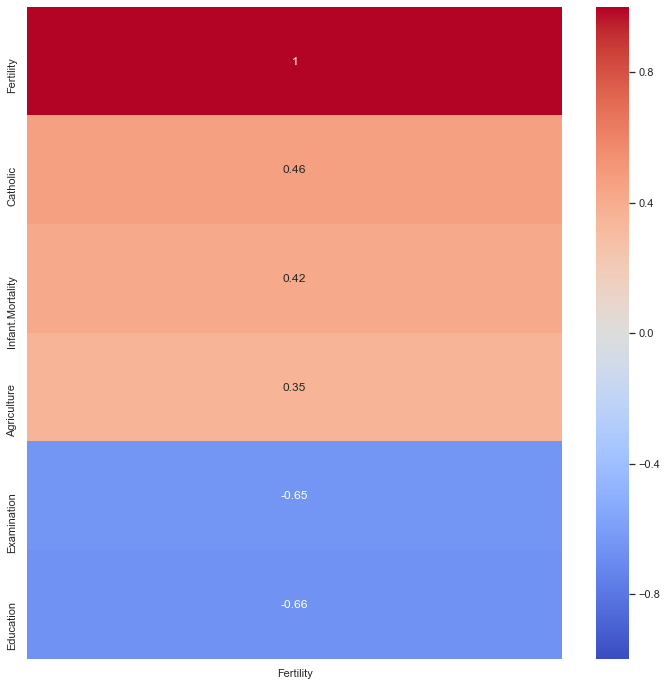

In [228]:
#mask = np.zeros_like(subjective_corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
correlation_swiss = swiss.drop(columns=["is_catholic"])
swiss_corr = correlation_swiss.corr()

plt.figure(figsize=(12,12))
sns.heatmap(swiss_corr[['Fertility']].sort_values(by='Fertility', ascending=False),
           vmin=-1,
           cmap='coolwarm',
           annot=True);
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

The best correlation for fertility rate is education - a negative correlation. That is to say, the lower the education level, the higher rate of fertility.

## Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [231]:
def get_db_url(username, hostname, password, db_name):
    return f"mysql+pymysql://{user}:{password}@{host}/{db_name}"

query = '''
    SELECT * 
    FROM orders
'''

url = get_db_url(user, host, password,'chipotle')

In [267]:
orders = pd.read_sql(query, url)

orders['price_val'] = orders.item_price.apply(lambda x: float(x.replace('$','').replace(',','')))
item_revenues = orders.groupby('item_name').price_val.agg(['count', 'sum']).sort_values(['count','sum'], ascending = False)
item_revenues['item'] = item_revenues.index
item_revenues = item_revenues.rename(columns={'count':'orders', 'sum':'revenues'})

top_items = item_revenues.sort_values(by='revenues', ascending=False)[:4]
top_items

,orders,revenues,item
item_name,,,
Chicken Bowl,726,7342.73,Chicken Bowl
Chicken Burrito,553,5575.82,Chicken Burrito
Steak Burrito,368,3851.43,Steak Burrito
Steak Bowl,211,2260.19,Steak Bowl


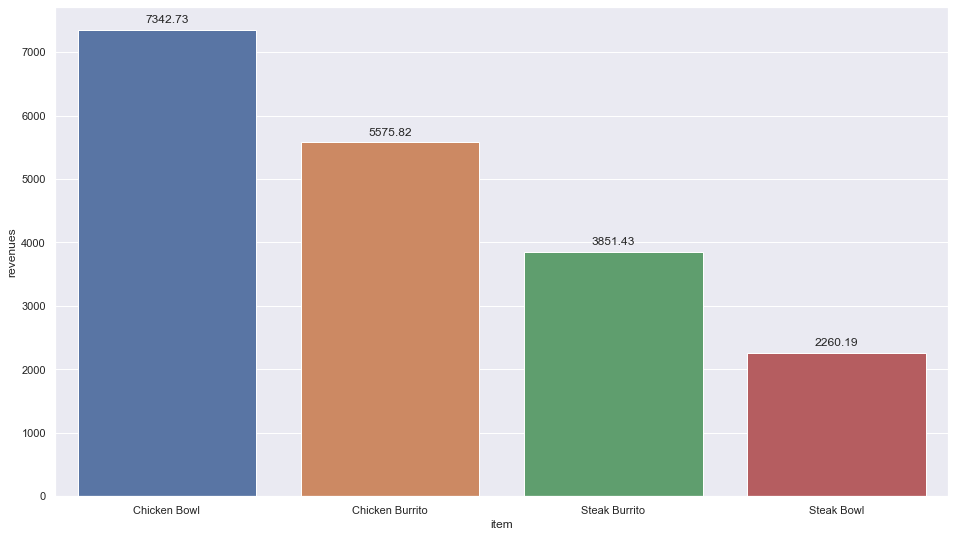

In [268]:
plt.figure(figsize=(16, 9))

pal = sns.color_palette("Blues_d", len(top_items))

chart = sns.barplot(x='item', y='revenues', data=top_items)

for p in chart.patches:
    chart.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = "center", xytext = (0, 10), textcoords = 'offset points')
                   
plt.show()

## Load the sleepstudy data and read it's documentation.

In [120]:
sleep_study = pydataset.data('sleepstudy')
sleep_study.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [59]:
pydataset.data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

## Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

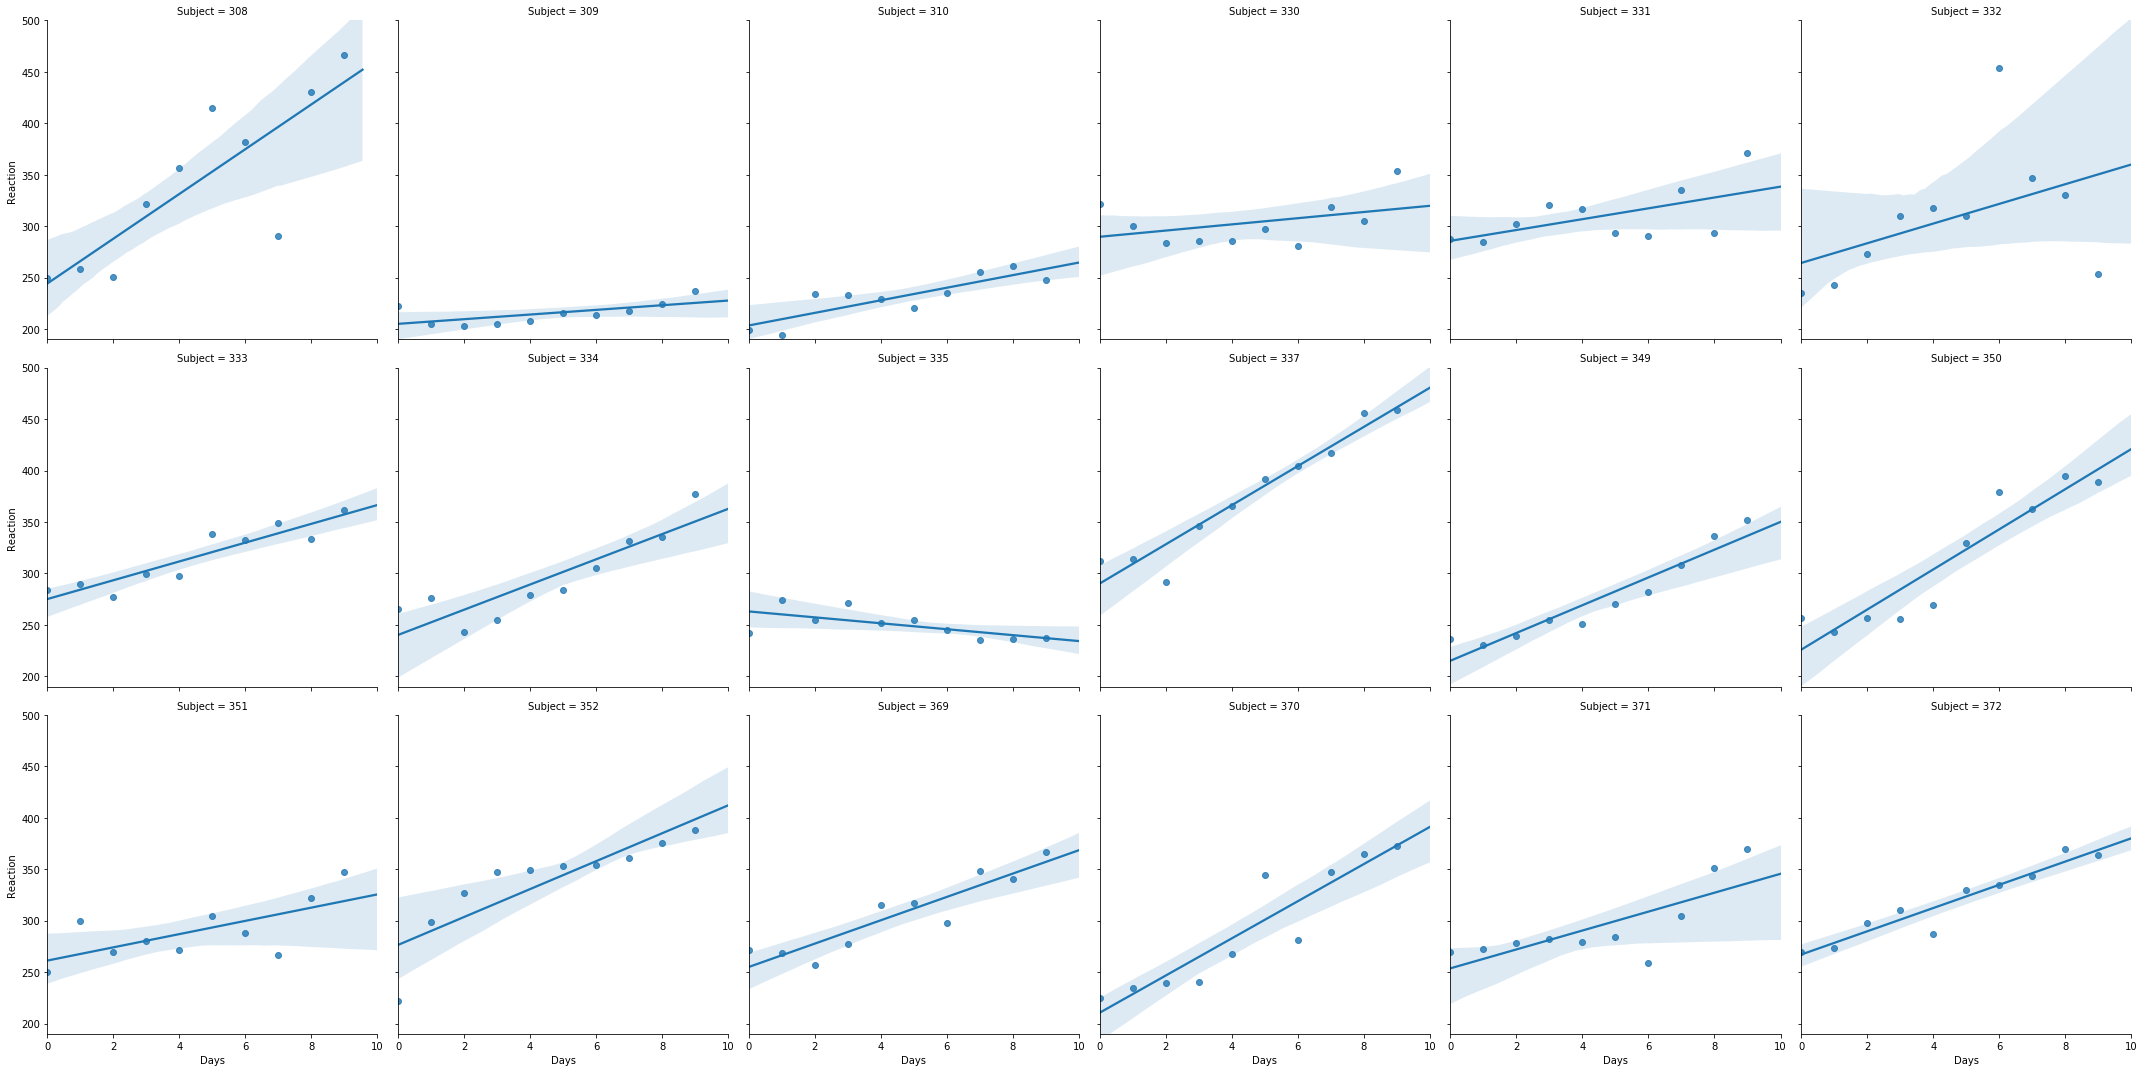

In [131]:
reaction_by_days_per_subject = sns.lmplot(x='Days', y="Reaction", col='Subject', col_wrap=6, data=sleep_study)
reaction_by_days_per_subject.set(xlim=(0,10), ylim=(190, 500))
plt.show()

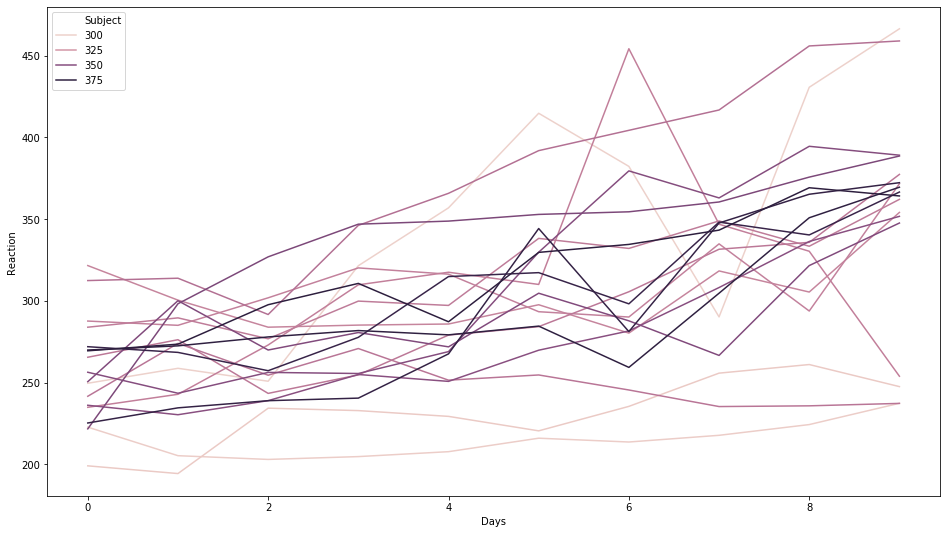

In [82]:
plt.figure(figsize=(16, 9))
sns.lineplot(data=sleep_study, y='Reaction', x='Days', hue='Subject')
plt.show()

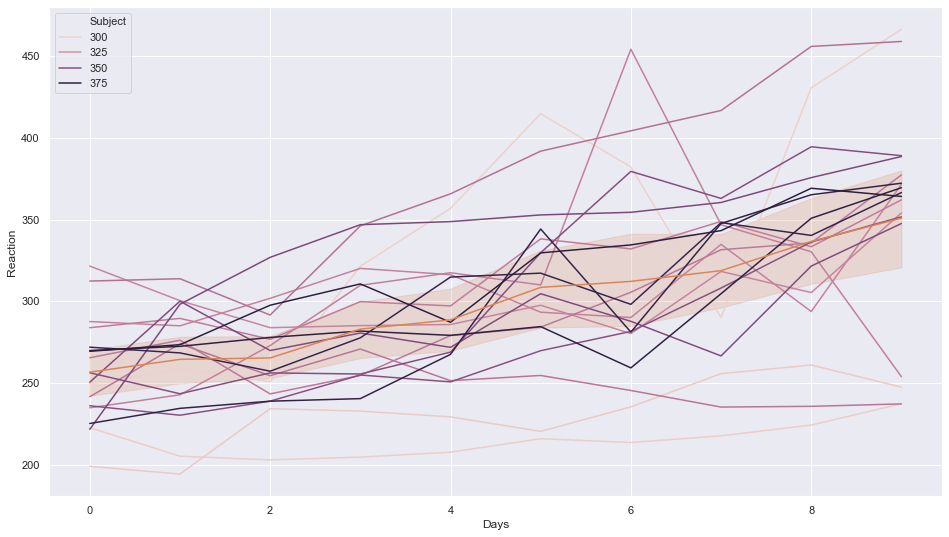

In [272]:
plt.figure(figsize=(16,9))
sns.lineplot(x='Days', y='Reaction', hue='Subject', data=sleep_study)
sns.lineplot(x='Days', y='Reaction', data=sleep_study, estimator='mean')
plt.show()